In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/ethiopia_fi_enriched.csv")


# Prepare Time Series

In [2]:
access = df[
    (df['indicator_code'] == 'ACC_OWNERSHIP') &
    (df['record_type'] == 'observation')
].sort_values('observation_date')


# Baseline Trend Model

In [3]:
x = np.arange(len(access))
y = access['value_numeric'].values

coef = np.polyfit(x, y, 1)
trend = np.poly1d(coef)


# Forecast 2025–2027

In [4]:
future_x = np.arange(len(access) + 3)
forecast = trend(future_x)


# Uncertainty Bands

In [5]:
upper = forecast + 5
lower = forecast - 5


# Plot Forecast

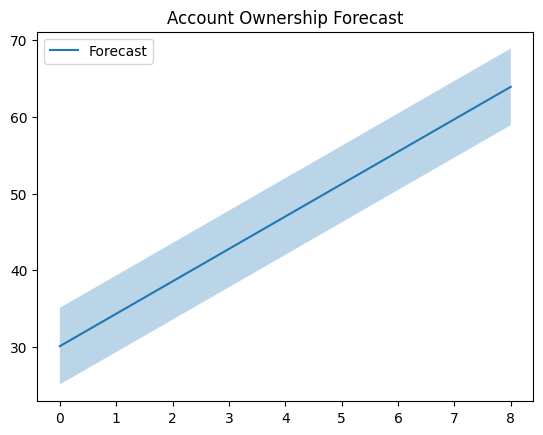

In [6]:
plt.plot(forecast, label="Forecast")
plt.fill_between(range(len(forecast)), lower, upper, alpha=0.3)
plt.legend()
plt.title("Account Ownership Forecast")
plt.show()
